In [61]:
import pandas as pd
import numpy as np

# Loan Prediction Model with MLflow Tracking

This notebook demonstrates a loan prediction model using Random Forest, with experiment tracking using MLflow.

## Workflow:
1. Data Loading and Preprocessing
2. Feature Engineering
3. Model Training
4. MLflow Experiment Setup
5. Multiple Training Runs with Different Parameters
6. View Results in MLflow UI

Follow the cells in sequence and run each one.

In [62]:
train_df = pd.read_csv(r'C:\Users\Rahil\OneDrive\Desktop\SCALER-20240901T061051Z-001\SCALER\MODULE 14 MLOPS\08_Mlflow\data.csv')
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,Y
1,LP001385,Male,No,0,Graduate,No,5316,0.0,136.0,360.0,1.0,Urban,Y
2,LP001926,Male,Yes,0,Graduate,No,3704,2000.0,120.0,360.0,1.0,Rural,Y
3,LP001144,Male,Yes,0,Graduate,No,5821,0.0,144.0,360.0,1.0,Urban,Y
4,LP002562,Male,Yes,1,Not Graduate,No,5333,1131.0,186.0,360.0,NaN,Urban,Y


In [63]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            430 non-null    object 
 1   Gender             420 non-null    object 
 2   Married            427 non-null    object 
 3   Dependents         416 non-null    object 
 4   Education          430 non-null    object 
 5   Self_Employed      410 non-null    object 
 6   ApplicantIncome    430 non-null    int64  
 7   CoapplicantIncome  430 non-null    float64
 8   LoanAmount         414 non-null    float64
 9   Loan_Amount_Term   422 non-null    float64
 10  Credit_History     394 non-null    float64
 11  Property_Area      430 non-null    object 
 12  Loan_Status        430 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 43.8+ KB


In [64]:
train_df['Gender']= train_df['Gender'].map({'Male':0, 'Female':1})
train_df['Married']= train_df['Married'].map({'No':0, 'Yes':1})
train_df['Loan_Status']= train_df['Loan_Status'].map({'N':0, 'Y':1})

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            430 non-null    object 
 1   Gender             420 non-null    float64
 2   Married            427 non-null    float64
 3   Dependents         416 non-null    object 
 4   Education          430 non-null    object 
 5   Self_Employed      410 non-null    object 
 6   ApplicantIncome    430 non-null    int64  
 7   CoapplicantIncome  430 non-null    float64
 8   LoanAmount         414 non-null    float64
 9   Loan_Amount_Term   422 non-null    float64
 10  Credit_History     394 non-null    float64
 11  Property_Area      430 non-null    object 
 12  Loan_Status        430 non-null    int64  
dtypes: float64(6), int64(2), object(5)
memory usage: 43.8+ KB


In [65]:
train_df.isnull().sum()


Loan_ID               0
Gender               10
Married               3
Dependents           14
Education             0
Self_Employed        20
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term      8
Credit_History       36
Property_Area         0
Loan_Status           0
dtype: int64

In [66]:
## dropping all the missing values
train_df = train_df.dropna()
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [67]:
X = train_df[['Gender', 'Married', 'ApplicantIncome', 'LoanAmount', 'Credit_History']]
y = train_df.Loan_Status
X.shape, y.shape

((335, 5), (335,))

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=5)

In [69]:
######
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=4, random_state=5)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [70]:
from sklearn.metrics import accuracy_score

pred_val = model.predict(X_val)
accuracy_score(y_val, pred_val)

0.7313432835820896

In [71]:
pred_train = model.predict(X_train)
accuracy_score(y_train, pred_train)

0.8134328358208955

In [ ]:
%pip install mlflow

import mlflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [79]:
mlflow.set_experiment("Loan Application")

<Experiment: artifact_location='file:c:/Users/Rahil/Downloads/mlruns/339193043524511513', creation_time=1761814861426, experiment_id='339193043524511513', last_update_time=1761814861426, lifecycle_stage='active', name='Loan Application', tags={'mlflow.experimentKind': 'custom_model_development'}>

In [80]:
def ml_flow_runs (n_est, max_dep, i):
    with mlflow.start_run():
        model_rf = RandomForestClassifier(max_depth=max_dep,n_estimators=n_est, random_state=5)
        model_rf.fit(X_train, y_train)
    
        pred_val = model_rf.predict(X_val)
        val_acc= accuracy_score(y_val, pred_val)
    
        pred_train = model_rf.predict(X_train)
        train_acc= accuracy_score(y_train, pred_train)

        run ="Run: "+str(i)
        mlflow.set_tag ('mlflow.runName',run)
        mlflow.log_param('max_depth',max_dep)
        mlflow.log_param('estimators',n_est)
        mlflow.log_metric ('val_acc', val_acc)
        mlflow.log_metric ('train_acc', train_acc)
    
        mlflow.sklearn.log_model(model_rf,"rf model")

In [81]:
for i in range(1,11):
    ml_flow_runs(10+i,1+i,i)

2025/10/30 14:53:08 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/30 14:53:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/10/30 14:53:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/10/30 14:53:13 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/30 14:53:13 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/30 14:53:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/10/30 14:53:19 WARNING mlflow.models.model: Model logged without a signature and input

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay 

2025/10/30 15:46:21 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/30 15:46:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/10/30 15:46:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


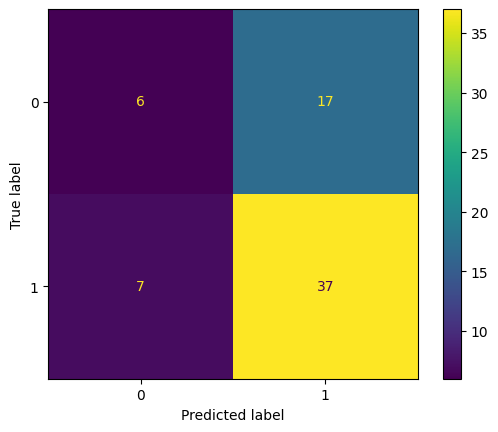

In [86]:
with mlflow.start_run():
    model_knn = KNeighborsClassifier(n_neighbors=5)
    model_knn.fit(X_train, y_train)

    pred_val = model_knn.predict(X_val)
    val_acc= accuracy_score(y_val, pred_val)

    pred_train = model_knn.predict(X_train)
    train_acc= accuracy_score(y_train, pred_train)

    run ="KNN"
    mlflow.set_tag ('mlflow.runName',run)
    mlflow.log_param('neighbors',5)
    mlflow.log_metric ('val_acc', val_acc)
    mlflow.log_metric ('train_acc', train_acc)
 
    cm = ConfusionMatrixDisplay.from_predictions(y_val, pred_val)
    cm.ax_.figure.savefig('confusion_matrix.png')
    
    mlflow.log_artifact('confusion_matrix.png')
    mlflow.sklearn.log_model(model_knn,"knn model")